<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Bad-or-Good-Customer-to-give-a-Loan-to-/blob/main/Data_Science_Good_or_Bad_Customer_to_give_a_loan_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project : Prediction if a Customer is Good or Bad to give a loan to**.

Based on same basic bank raw data, we will be analyzing the dataset by going through all the crucial steps of a Data Science Project, from preparing the Data to Building the Machine Learning Model, in order to validate it to have it as a reference for a bank or any financial institution that preoccupy to give loans to its customers.

And in this project we will try to build ultimately a Logistic Regression Model and understand the hyper parameters that can allow us to optimize our choices for a an optimal model.

### **Importing & Installing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


%matplotlib inline

# Increase the size of seaborn plots
sns.set(rc = {'figure.figsize': (8, 8)})

# !conda list check the packages installed

#### **Step 1 : Getting the Data**

In [2]:
# Loading the data to google colab
from google.colab import files
uploaded = files.upload()

Saving Raw_Data.csv to Raw_Data.csv


In [3]:
raw_data = pd.read_csv("Raw_Data.csv")

# Displaying the First Rows of the Data
display(raw_data.head(10), "The Shape of the DataSet is {}".format(raw_data.shape))

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No
5,No Data,critical,Learning / Edu purposes,6130.0,0-200,2-5 Years,Male,No,No Security,30.0,Free,Skilled Labor,No,No
6,No Data,critical,Buying a New Car,1394.0,0-200,0-2 Years,Female,No,Vehicle,37.0,House Owner,Professional / Management,No,No
7,No Data,critical,Buying a New Car,7242.0,0-200,2-5 Years,Male,No,Savings Account,41.0,House Owner,Services,No,No
8,No Data,critical,TV,9581.0,0-200,2-5 Years,Female,No,Vehicle,31.0,House Owner,Skilled Labor,No,No
9,No Data,critical,TV,734.0,No Data,7+ Years,Male,No,Savings Account,44.0,Renting,Services,No,No


'The Shape of the DataSet is (1006, 14)'

In [4]:
# Copying the Data in order to proceed to benchmarking when we finish analyzing the Data 
df = raw_data.copy()

#### **Step 2 : Data Preprocessing**

In [5]:
# Exploring the Data
display("The Features of the DataSet are ", df.columns)

'The Features of the DataSet are '

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

In [6]:
# Exploring the DataTypes of our Features
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Stauts         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

So apparently, we have only two features with purely numeric data the *Loan Amount* & *Age* columns. And for the rest of the Data, the type that we have is the *Object*. 
At all events, we will convert our data to dummy one in order to build the Model.

In [7]:
# Displaying the Unique Values of each columns
for column in df:
  if len(df[column].unique()) < 10:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))


The Number of Values for the Feature Type of Account : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature Account History : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature Reason for the Loan : 11
The Number of values for the Feature Loan Amount : 914
The Number of Values for the Feature Account Savings : ['0-200' 'No Data' '200-500' '1000+' '500-1000' nan '0-201'] ---- 7
The Number of Values for the Feature Employment History : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature Individual Stauts : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature Other Loans : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature Security / Collateral : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature Age : 58
The Number of Values for the Featu

In [8]:
# Describing the Data 
df.describe()

,Loan Amount,Age
count,1.003000e+03,1002.000000
mean,-5.436215e+05,35.841317
std,1.732054e+07,14.657180
min,-5.485413e+08,18.000000
25%,1.374500e+03,27.000000
50%,2.326000e+03,33.000000
75%,3.981500e+03,42.000000
max,1.842700e+04,327.000000


In [9]:
# Displaying the Kurtosis and the Skewness of the Data
display("The Kurtosis of the DataSet is {}".format(df.kurtosis()))

display("The Skewness of the DataSet is {}".format(df.skew()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


'The Kurtosis of the DataSet is Loan Amount    1002.999947\nAge             154.752052\ndtype: float64'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


'The Skewness of the DataSet is Loan Amount   -31.670174\nAge             8.278180\ndtype: float64'

After descring the Data, we observe some for example some aberrant data in both the Loan Amount and the Age features.
For instance, the minimum Loan amount as stated above is **-5.485413e+08**, which is cannot be possible for a loan to be negative, so we need to drop some data later on.
At the same time, by looking at the Age column, wa can figure out that some data is also false, like the the max Age that is 327 years old, effectively a human being cannot surpass 150 years, except LEGENDS THAT CAN LIVE FOREVER, JUST KIDDING, let's get back to work.

In [10]:
df.info

<bound method DataFrame.info of      Type of Account         Account History  ... Completed Other loan?  Good Loan
0            No Data                critical  ...                    No         No
1            No Data                critical  ...                    No         No
2            No Data                critical  ...                    No         No
3            No Data                critical  ...                   Yes         No
4            No Data                critical  ...                    No         No
...              ...                     ...  ...                   ...        ...
1001          Type C  Average (known delays)  ...                    No        Yes
1002          Type C  Average (known delays)  ...                    No         No
1003          Type C  Average (known delays)  ...                    No        Yes
1004             NaN                     NaN  ...                    No        NaN
1005             NaN                     NaN  ...      

In [11]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  if len(df[column].unique()) < 7:
    print('The Number of Values for the Feature "{}" : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature "{}" : {}'.format(column, len(df[column].unique())))



The Number of Values for the Feature "Type of Account" : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature "Account History" : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature "Reason for the Loan" : 11
The Number of values for the Feature "Loan Amount" : 914
The Number of values for the Feature "Account Savings" : 7
The Number of Values for the Feature "Employment History" : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature "Individual Stauts" : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature "Other Loans" : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature "Security / Collateral" : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature "Age" : 58
The Number of Values for the Feature "Residence Status" : ['House Owner' 'Rentin

In [12]:
# Rename the column "Individual Stauts", cause there's a miss spelling
df.rename(columns = {"Individual Stauts": 'Individual Status'}, inplace = True)

**Reminder** : Among the steps in the EDA process, we have the **Outliers Indentification**, but in our case, we don't have relevant numeric Data, so we will pass by this step.

##### Dropping Duplicate Rows

In [13]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (1006, 14)


'The Shape of the Duplicate Rows DataFrame is (0, 14)'

**Comment** : The Number of Rows of the Duplicated DataFrame is ZERO, so we don't have any duplicant rows.

##### Checking for any missing Data

In [14]:
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Status        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

**Comment** : apparently, every feature of the DataSet, have some missing Data to be looking at to decide what if it would be reasonable to keep them, or just drop them from the DataSet.

#### **Step 3 : Data Vizualisation**

Visualizing misisng values graphicaly

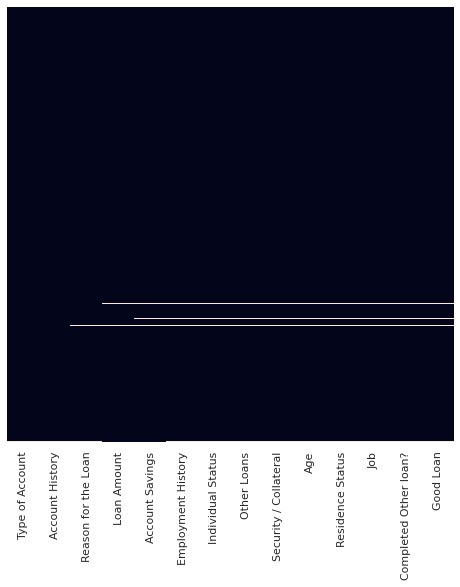

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)

By looking at the heatmap, we perceive that we effectively have some missing data, that we can visualize

To visualize the exact missing lines, we need to do a filter on one of the columns with the missing values.

For example, we will choose **Individual Status** feature.

In [16]:
# Viz the Missing Rows based on the Individual Status
df[df['Individual Status'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Printing the shape of the DataFrame before removing any missing value
print("The Num of Rows of the Original DataFrame",df.shape[0])

# Removing the Missing values
df = df.dropna(subset = ['Individual Status'])

The Num of Rows of the Original DataFrame 1006


In [18]:
df.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Status        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

So we have cleaned our data, and we don't have missing values anymore.

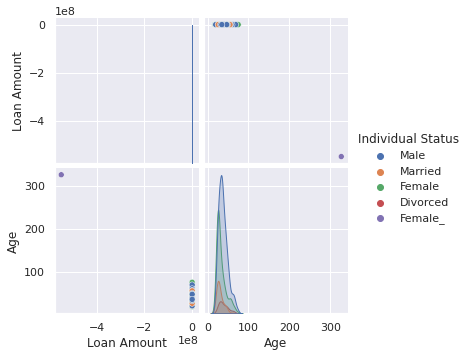

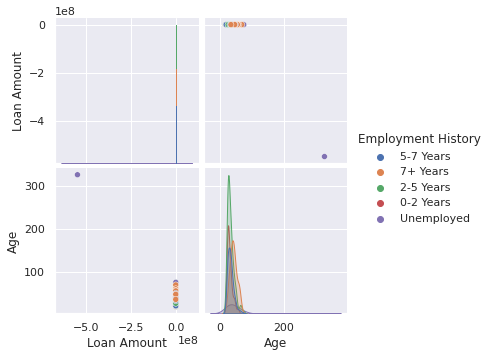

In [19]:
sns.pairplot(df, hue = 'Individual Status')
sns.pairplot(df, hue = 'Employment History')

**Comment** : By looking at either of the pairplots above, we can find that we have outliers like we've mentionned before of an age beyond 300 years, and a negative loan amount.

#### **Step 4 : Data Cleansing**

Deleting the Outliers

In [ ]:
# Wa can eliminate the outliers, by applying some filters
df = df[df['Age'] < 100] 

# Eliminate the negative Loan Amounts
df = df[df["Loan Amount"] > 0]

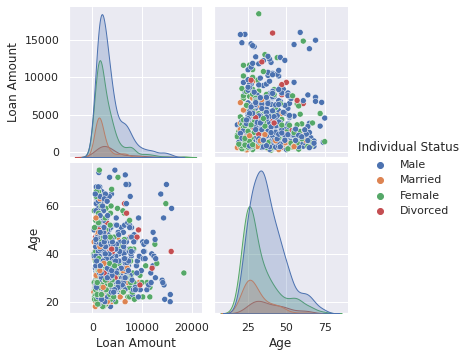

In [ ]:
# Rerunning the pairplots
sns.pairplot(df, hue  = 'Individual Status')

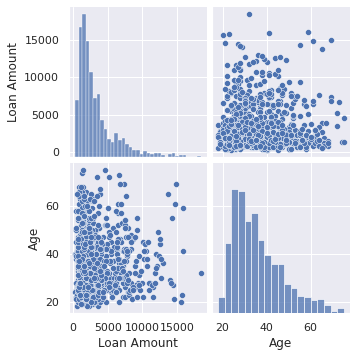

In [ ]:
sns.pairplot(df)

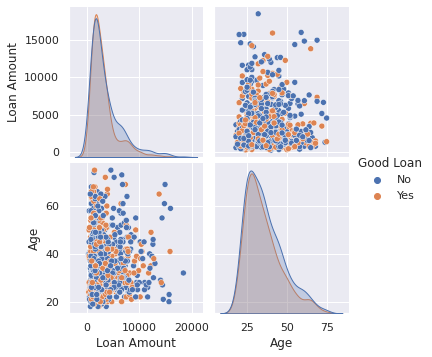

In [ ]:
sns.pairplot(df, hue = 'Good Loan')

Investigating the distribution of y

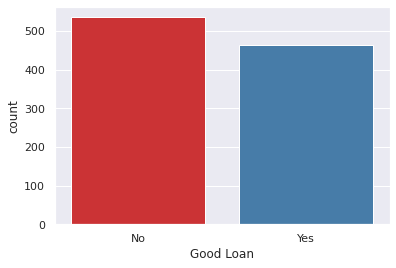

In [ ]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1")

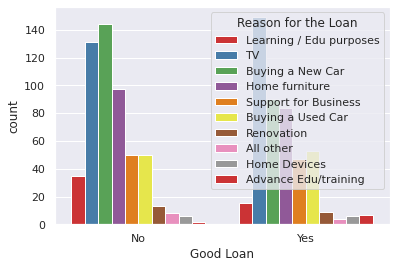

In [ ]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1", hue = 'Reason for the Loan')

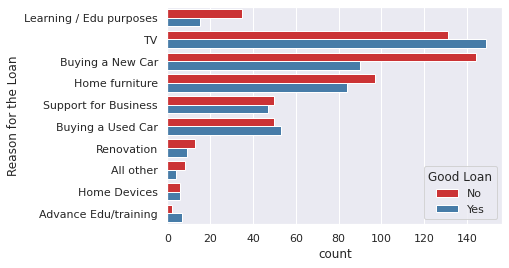

In [ ]:
sns.countplot(y = 'Reason for the Loan', data = df, palette = "Set1", hue = "Good Loan")

if we look closely at the graph, we observe that for every *Reason to Buy a Loan* the answer NO is more than the answer YES, so based on this dataset the bank normaly take caution before approving a loan.
However for the *Advance Edu/training* we notice that the answer YES is way more than the answer NO, and the same goes for *Buying a Used Car*.
So from now on we need to enthral on attention on this.

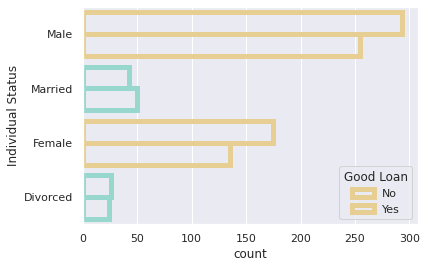

In [ ]:
sns.countplot(y ='Individual Status', data = df,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2), hue = "Good Loan")

In [ ]:
# sns.set(rc={'figure.figsize':(18,18)})
# sns.violinplot(y = "Age", x = 'Loan Amount', data = df, hue = "Good Loan")

In [ ]:
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Status         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

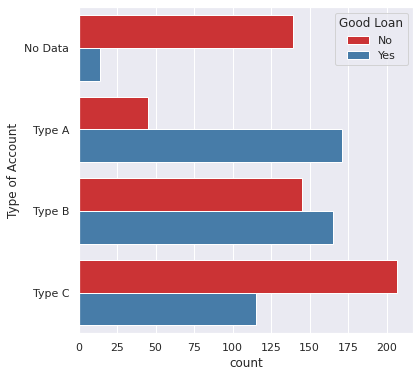

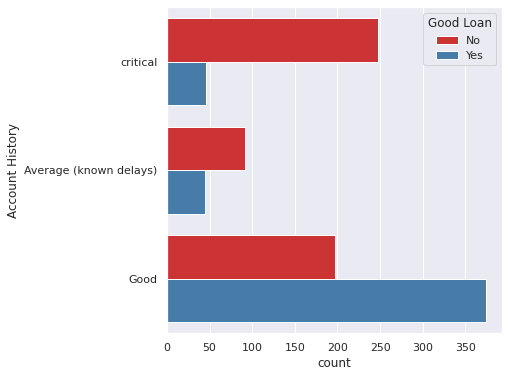

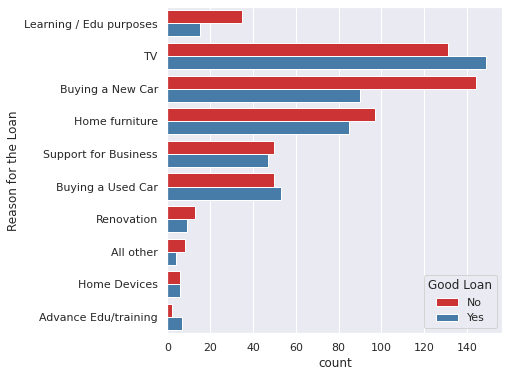

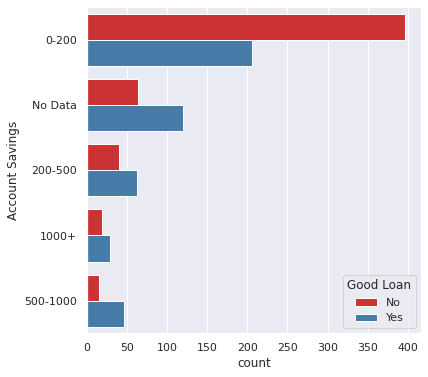

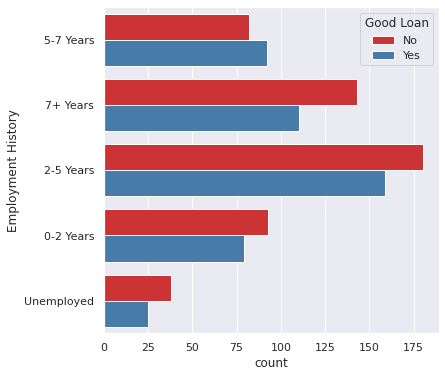

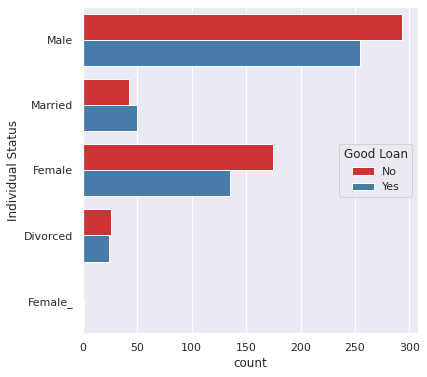

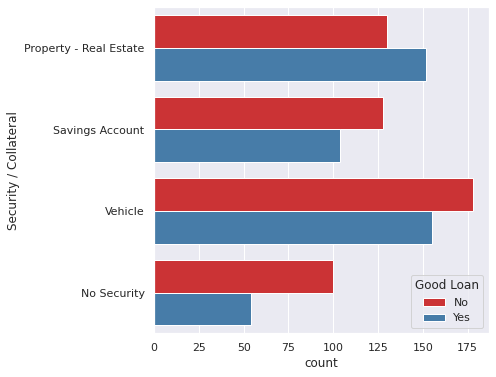

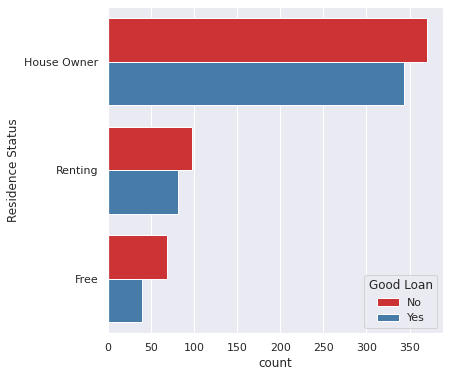

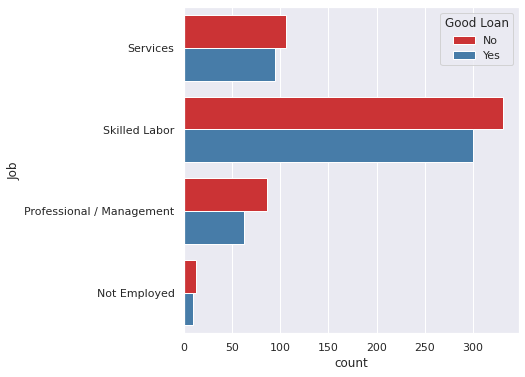

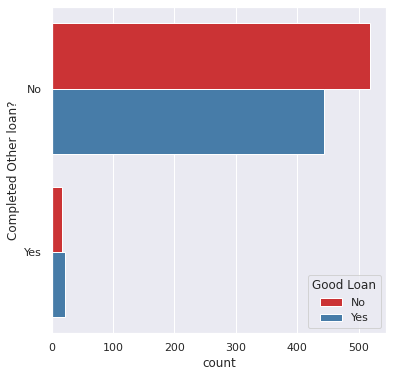

In [21]:
# Applying the countplot for every non numeric feature
features = [
       'Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Status', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?'
]

for feature in features:
  sns.set(rc = {'figure.figsize': (6, 6)})
  sns.countplot(y = feature, data = df, hue = "Good Loan", palette = "Set1")
  plt.show()

Encoding the Data from categorical to numeric data

In [23]:
# Encoding the Data 
# df = pd.get_dummies(df, columns = features)

# changing the Good Loan Values from Y/N to 1s & 0s
df['Good Loan'][df['Good Loan'] == "Yes"] = 1
df['Good Loan'][df['Good Loan'] == "No"] = 0

df['Other Loans'][df['Other Loans'] == "Yes"] = 1
df['Other Loans'][df['Other Loans'] == "No"] = 0

# Displaying the Data
df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is try

,Loan Amount,Other Loans,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Female_,Individual Status_Male,Individual Status_Married,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,0,47.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,2438.0,0,52.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2144.0,0,48.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,2073.0,0,25.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1
4,1276.0,0,59.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,0,47.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1000,4473.0,0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1001,12759.0,0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1002,2551.0,0,47.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [24]:
# Checking to see the number of rows that corresponds to "Other Laons" values

display(df[df["Other Loans"] == 0].value_counts)

print("~"*100)

display(df[df["Other Loans"] == 1].value_counts)

<bound method DataFrame.value_counts of       Loan Amount  ... Completed Other loan?_Yes
0          2116.0  ...                         0
1          2438.0  ...                         0
2          2144.0  ...                         0
3          2073.0  ...                         1
4          1276.0  ...                         0
...           ...  ...                       ...
999        3602.0  ...                         0
1000       4473.0  ...                         0
1001      12759.0  ...                         0
1002       2551.0  ...                         0
1003       1587.0  ...                         0

[908 rows x 49 columns]>

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<bound method DataFrame.value_counts of      Loan Amount  ... Completed Other loan?_Yes
10        1421.0  ...                         0
54        2351.0  ...                         0
87        5968.0  ...                         0
88        2790.0  ...                         0
94        1867.0  ...                         0
..           ...  ...                       ...
944       1894.0  ...                         0
948       1194.0  ...                         0
949       7302.0  ...                         0
957        791.0  ...                         0
997       7827.0  ...                         0

[93 rows x 49 columns]>

In [25]:
df[df['Good Loan'] == 1]

,Loan Amount,Other Loans,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Female_,Individual Status_Male,Individual Status_Married,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
15,3579.0,0,45.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
17,1259.0,0,38.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
19,699.0,0,50.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
20,1595.0,0,46.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
21,1917.0,0,34.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,7686.0,0,42.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
997,7827.0,1,41.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
998,8950.0,0,32.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1001,12759.0,0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [26]:
df['Good Loan'][df['Good Loan'] == 1]

15      1
17      1
19      1
20      1
21      1
       ..
996     1
997     1
998     1
1001    1
1003    1
Name: Good Loan, Length: 465, dtype: object

#### **Step 4 : Features Selection** 

Step of Running feature selection:
- Split the Data into X & y.
- Run a Tree-based estimator (i.g Decision Tree, Random Forest).
- Run feature importance.

In [27]:
# Split the data into X & y

colummns_to_drop = ['Good Loan', 'Age', 'Loan Amount', "Other Loans"]

X = df.drop(colummns_to_drop, axis = 1).values
y = df['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1001, 45)
(1001,)


Running Decision Tree Classifier 

In [28]:
# Creating the Based Tree Model (In our case we choose the Decision Tree Model)
decision_tree = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)

In [30]:
decision_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [31]:
fi_col = []
fi = []

# Looking for features importance
for i, column in enumerate(df.drop(colummns_to_drop, axis = 1)):
  print("The Feature Imortance of the '{}' ---:--- {}".format(column, decision_tree.feature_importances_[i]))

  fi_col.append(column)
  fi.append(decision_tree.feature_importances_[i])

The Feature Imortance of the 'Type of Account_No Data' ---:--- 0.05627154168116459
The Feature Imortance of the 'Type of Account_Type A' ---:--- 0.05796814119279767
The Feature Imortance of the 'Type of Account_Type B' ---:--- 0.011159344514254385
The Feature Imortance of the 'Type of Account_Type C' ---:--- 0.004638022334844308
The Feature Imortance of the 'Account History_Average (known delays)' ---:--- 0.0
The Feature Imortance of the 'Account History_Good' ---:--- 0.19916991558909689
The Feature Imortance of the 'Account History_critical' ---:--- 0.0
The Feature Imortance of the 'Reason for the Loan_Advance Edu/training' ---:--- 0.0
The Feature Imortance of the 'Reason for the Loan_All other' ---:--- 0.0037432451957117837
The Feature Imortance of the 'Reason for the Loan_Buying a New Car' ---:--- 0.02220535196463182
The Feature Imortance of the 'Reason for the Loan_Buying a Used Car' ---:--- 0.01282640332838197
The Feature Imortance of the 'Reason for the Loan_Home Devices' ---:---

For more visuality we will create a DataFrame, and we will put the the Feature importance on it.

In [33]:
# Create a DataFrame
fi_df = zip(fi_col, fi)

# Creating a Pandas DataFrame
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

,Feature,Feature Importance
0,Type of Account_No Data,0.056272
1,Type of Account_Type A,0.057968
2,Type of Account_Type B,0.011159
3,Type of Account_Type C,0.004638
4,Account History_Average (known delays),0.000000
5,Account History_Good,0.199170
6,Account History_critical,0.000000
7,Reason for the Loan_Advance Edu/training,0.000000
8,Reason for the Loan_All other,0.003743
9,Reason for the Loan_Buying a New Car,0.022205


In [34]:
###  Ordering the Data

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()


# fi_df.drop("level_0", axis = 1, inplace = True)

fi_df


,index,Feature,Feature Importance
0,17,Account Savings_0-200,0.212138
1,5,Account History_Good,0.199170
2,1,Type of Account_Type A,0.057968
3,0,Type of Account_No Data,0.056272
4,25,Employment History_7+ Years,0.035307
5,21,Account Savings_No Data,0.027292
6,34,Security / Collateral_Savings Account,0.024115
7,9,Reason for the Loan_Buying a New Car,0.022205
8,33,Security / Collateral_Property - Real Estate,0.020989
9,30,Individual Status_Male,0.020604


Based on the DataFrame above, we will remove from now on the columns with the column importance of **ZERO**, to be able to build our Logistic Regression Model.

In [35]:
# Selecting the Data that we will be keeping 
fi_df = fi_df[0:41]

In [36]:
fi_df

,index,Feature,Feature Importance
0,17,Account Savings_0-200,0.212138
1,5,Account History_Good,0.199170
2,1,Type of Account_Type A,0.057968
3,0,Type of Account_No Data,0.056272
4,25,Employment History_7+ Years,0.035307
5,21,Account Savings_No Data,0.027292
6,34,Security / Collateral_Savings Account,0.024115
7,9,Reason for the Loan_Buying a New Car,0.022205
8,33,Security / Collateral_Property - Real Estate,0.020989
9,30,Individual Status_Male,0.020604


In [37]:
# The Columns to keep in the analysis
columns_to_keep = fi_df['Feature'][0:41]

# Print them to check
columns_to_keep


0                            Account Savings_0-200
1                             Account History_Good
2                           Type of Account_Type A
3                          Type of Account_No Data
4                      Employment History_7+ Years
5                          Account Savings_No Data
6            Security / Collateral_Savings Account
7             Reason for the Loan_Buying a New Car
8     Security / Collateral_Property - Real Estate
9                           Individual Status_Male
10                    Employment History_5-7 Years
11                         Account Savings_200-500
12        Reason for the Loan_Support for Business
13               Security / Collateral_No Security
14              Reason for the Loan_Home furniture
15                    Residence Status_House Owner
16                    Employment History_2-5 Years
17                   Employment History_Unemployed
18                                    Job_Services
19           Reason for the Loa

#### **Step 5** : Splitting the Data, Hold-Out Validation



In [38]:
# Defining the X & y DataSets
X = df[columns_to_keep].values
y = df['Good Loan']

# Converting the type from Object to int
y = y.astype(int)

# Printing the Shape of X & y
display(X.shape, y.shape)

(1001, 41)

(1001,)

In [39]:
# Hold-Out Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 12)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, random_state = 12)

# Printing the Shape of the Multiple Sets
display("The Shape of X Sets")
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
  
display("The Shape of y Sets")
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

'The Shape of X Sets'

(720, 41)
(201, 41)
(80, 41)


'The Shape of y Sets'

(720,)
(201,)
(80,)


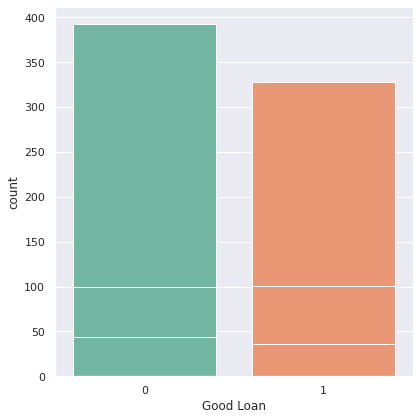

In [40]:
# Checking for the Distribution of the ys to see if we don't have any unbalanced data
ys = [y_train, y_test, y_valid]

for y in ys:
  plt.rcParams["figure.autolayout"] = True
  seaborn_plot = sns.countplot(x = y, palette = "Set2")
  for p in seaborn_plot.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)



#### **Step 6** : Building the ML Model

The Comparaison between the Linear Regression and the Logistic Regression Model.
For our case, we will be deploying a Logistic Regression Model.

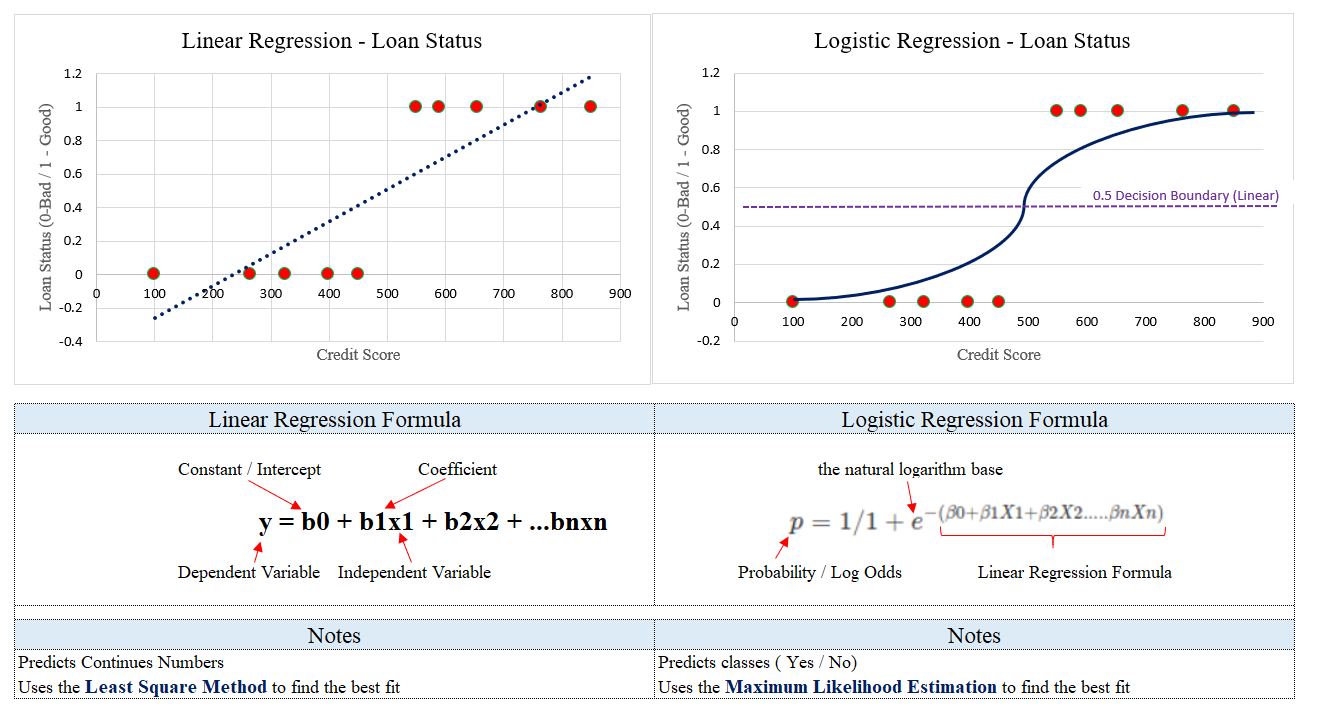

Some Details:

- We fit an "S" Shape logistic Function
- The curve tells you the porbability if a loan is good or bad
- If we have a high Credit score, there is a high probability that it's a good loan

In [41]:
# Creating the ML Model and training it
log_reg = LogisticRegression(random_state = 15, solver = 'lbfgs')

# Training the model on the Data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=15)

In [42]:
# Predicting the Data
y_pred = log_reg.predict(X_train)

# Displaying the Predicting Vector
display(type(y_pred), y_pred, y_pred.shape)

numpy.ndarray

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,

(720,)

In [43]:
# Predicting the Density of Probability
prob_y_pred = log_reg.predict_proba(X_train)

# Displaying the Matrix of Probabilities Predictions
display(type(prob_y_pred), prob_y_pred, prob_y_pred.shape)

numpy.ndarray

array([[0.06992334, 0.93007666],
       [0.33929297, 0.66070703],
       [0.09738816, 0.90261184],
       ...,
       [0.88814676, 0.11185324],
       [0.51506075, 0.48493925],
       [0.20236608, 0.79763392]])

(720, 2)

In [44]:
# Predict logarithm of probability estimates
log_prob_y_pred = log_reg.predict_log_proba(X_train)

# Displaying the Matrix of Probabilities Predictions
display(type(log_prob_y_pred), log_prob_y_pred, log_prob_y_pred.shape)

numpy.ndarray

array([[-2.66035572, -0.07248827],
       [-1.08089133, -0.41444476],
       [-2.32905062, -0.10246268],
       ...,
       [-0.11861828, -2.19056758],
       [-0.66347042, -0.72373166],
       [-1.59767696, -0.22610553]])

(720, 2)

In [47]:
# Coefficients of the feature
log_reg.coef_

array([[-1.47822464,  1.96479028,  1.14454214, -1.18402659,  0.0678943 ,
         0.12842316,  0.00215897, -0.72938476,  0.45513245,  0.14612514,
         0.60489877,  0.0104534 , -0.04561801, -0.43451879,  0.10601269,
         0.1145802 , -0.22641819, -0.1633587 ,  0.05715777,  0.44687239,
        -0.65185763, -0.09479442, -0.0227645 ,  0.68724049, -0.28300806,
         0.31862185,  0.02224653, -0.02127407,  0.65211573, -0.29000023,
        -0.11804439, -0.22075027, -0.3182703 ,  0.10901534, -0.27912926,
         0.2207584 ,  0.03486788,  0.11218878,  0.00347232, -0.52145226,
         0.66577976]])

In [48]:
# Inspecting the shape of the Data
log_reg.predict(X_train).shape

(720,)

#### Step 7 : Evaluating the Model

In [49]:
# Scoring the Training Data
print("The Training Accuracy : ", log_reg.score(X_train, y_train))

# Scoring the Testing Data
print("The Testing Accuracy : ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy :  0.7722222222222223
The Testing Accuracy :  0.7860696517412935
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       392
           1       0.75      0.74      0.75       328

    accuracy                           0.77       720
   macro avg       0.77      0.77      0.77       720
weighted avg       0.77      0.77      0.77       720



**Defining the Confusion Matrix Function**

In [98]:
def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
  if classes is not None:
    sns.heatmap(cm, cmap = 'BuPu', xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
    sns.heatmap(cm, vmin = 0, vmax = 1)
  plt.title(title)
  plt.ylabel('True Labels')
  plt.xlabel("Predicted Labels")

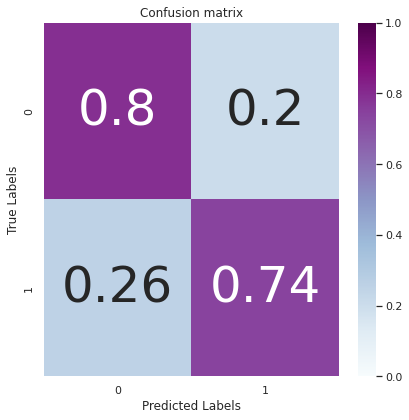

In [52]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [53]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.79591837 0.74390244]
The Precision is: [0.78787879 0.75308642]
The False positive rate is: [0.25609756 0.20408163]
The False Negative Rate is:  [0.20408163 0.25609756]

The average TPR is: 0.7699104031856645
The average Precision is: 0.7704826038159371
The average False positive rate is: 0.2300895968143355
The average False Negative Rate is: 0.2300895968143355


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


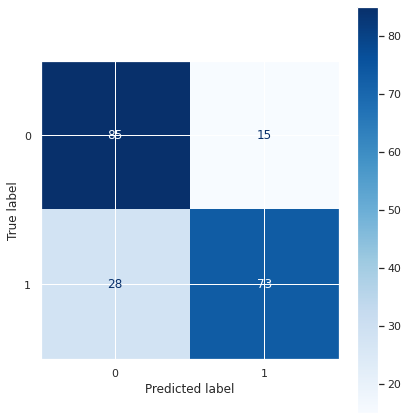

In [54]:
from sklearn.metrics import plot_confusion_matrix

cm_plotting = plot_confusion_matrix(log_reg, X_test, y_test, cmap = 'Blues', values_format = '.3g')

In [ ]:
cm_plotting.confusion_matrix

array([[85, 16],
       [23, 76]])

#### Step 8 : Evaluating the Log Loss / Cross Loss

In [59]:
# Log Loss on the Training DataSet
print("The Log Loss of the Training Dataset {}".format(log_loss(y_train, prob_y_pred)))


# Log Loss on the Testing Dataset 
prob_y_test_pred = log_reg.predict_proba(X_test)
print("The Log Loss of the Testing Dataset {}".format(log_loss(y_test, prob_y_test_pred)))

The Log Loss of the Training Dataset 0.45762888091061343
The Log Loss of the Testing Dataset 0.47724076268275667


**Comment :** We observe that the Log Loss of the Testing dataset is slightly bigger than the log loss of the training Dataset, which is normal, cuz the model has already seen the training data.

#### Step 9 : Optimization, the hyper parameters tuning

- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

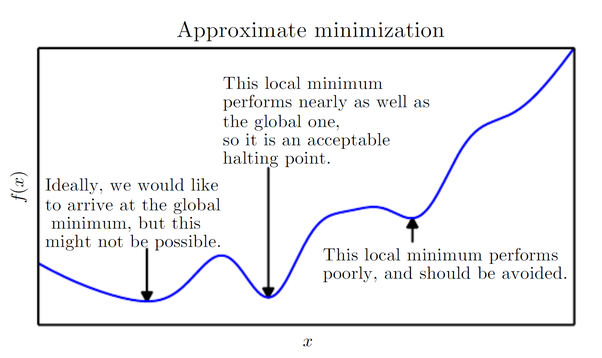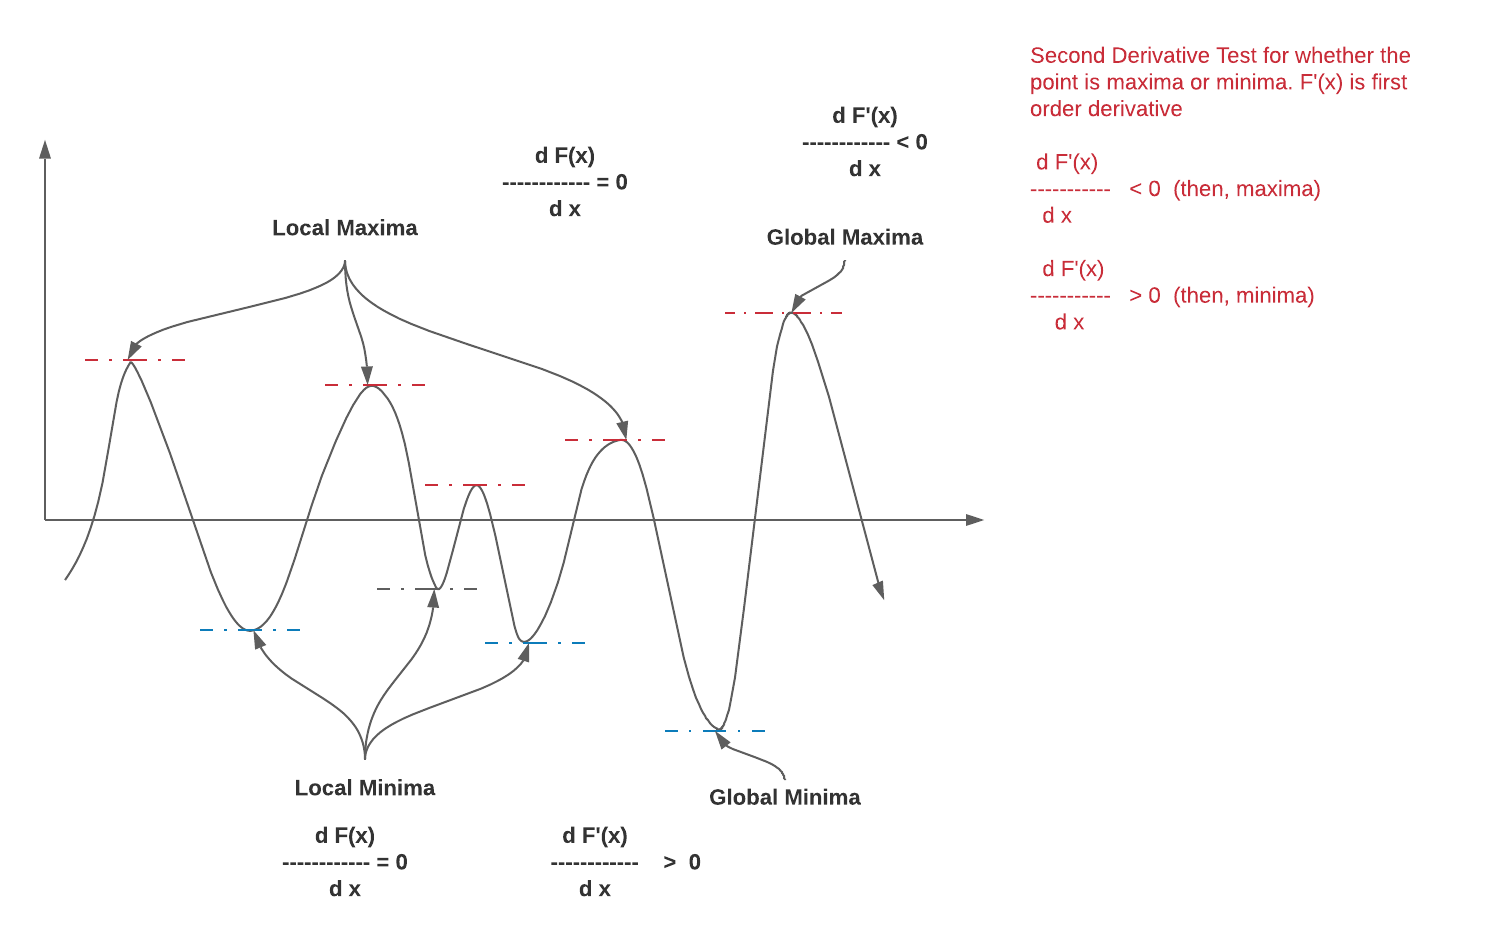

In [60]:
# Creating a geom space to create ranges for the C parameter
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

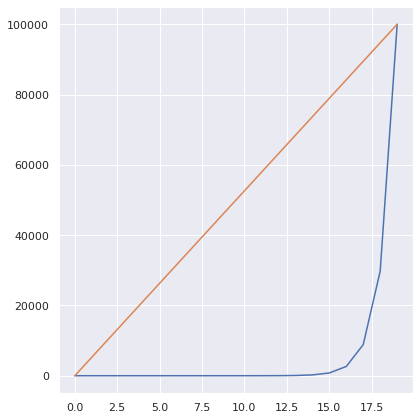

In [61]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [90]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
Classification_Accuracy = []
logarithmic_loss = []

for c in C_List:
  # Running the LR Model
  log_reg_optz = LogisticRegression(random_state = 10, solver = 'lbfgs', C = c)
  log_reg_optz.fit(X_train, y_train)
  score = log_reg_optz.score(X_test, y_test)

  # Score evalution
  Classification_Accuracy.append(score)
  print("The Classification Accuracy of the '{}' parameter is : ----- {}".format(c, score))

  # Evaluating the Log Loss Metric
  y_proba_test_optz = log_reg_optz.predict_proba(X_test)
  log_loss_optz = log_loss(y_test, y_proba_test_optz)
  logarithmic_loss.append(log_loss_optz)
  print(type(log_loss_optz))

  print("The Log loss of the '{}' Parameter is : ----- ".format(c, log_loss_optz))
  print("")


The Classification Accuracy of the '1e-05' parameter is : ----- 0.4975124378109453
<class 'numpy.float64'>
The Log loss of the '1e-05' Parameter is : ----- 

The Classification Accuracy of the '3.359818286283781e-05' parameter is : ----- 0.4975124378109453
<class 'numpy.float64'>
The Log loss of the '3.359818286283781e-05' Parameter is : ----- 

The Classification Accuracy of the '0.00011288378916846884' parameter is : ----- 0.4975124378109453
<class 'numpy.float64'>
The Log loss of the '0.00011288378916846884' Parameter is : ----- 

The Classification Accuracy of the '0.000379269019073225' parameter is : ----- 0.4975124378109453
<class 'numpy.float64'>
The Log loss of the '0.000379269019073225' Parameter is : ----- 

The Classification Accuracy of the '0.0012742749857031334' parameter is : ----- 0.5024875621890548
<class 'numpy.float64'>
The Log loss of the '0.0012742749857031334' Parameter is : ----- 

The Classification Accuracy of the '0.004281332398719391' parameter is : ----- 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The Classification Accuracy of the '69.51927961775606' parameter is : ----- 0.7860696517412935
<class 'numpy.float64'>
The Log loss of the '69.51927961775606' Parameter is : ----- 

The Classification Accuracy of the '233.57214690901213' parameter is : ----- 0.7860696517412935
<class 'numpy.float64'>
The Log loss of the '233.57214690901213' Parameter is : ----- 

The Classification Accuracy of the '784.7599703514607' parameter is : ----- 0.7860696517412935
<class 'numpy.float64'>
The Log loss of the '784.7599703514607' Parameter is : ----- 

The Classification Accuracy of the '2636.6508987303555' parameter is : ----- 0.7860696517412935
<class 'numpy.float64'>
The Log loss of the '2636.6508987303555' Parameter is : ----- 

The Classification Accuracy of the '8858.667904100832' parameter is : ----- 0.7860696517412935
<class 'numpy.float64'>
The Log loss of the '8858.667904100832' Parameter is : ----- 

The Classification Accuracy of the '29763.51441631313' parameter is : ----- 0.78606965

In [91]:
# Turning the results above into a pandas DataFrame
# C_List

# Converting from list to numpy
Class_Acc = np.array(Classification_Accuracy).reshape(20,)
Log_Loss = np.array(logarithmic_loss).reshape(20,)

# Creating a dataframe
outcomes = zip(C_List, Class_Acc, Log_Loss)

df_outcomes = pd.DataFrame(outcomes, columns = ["C Param", "Accuracy", "Log Loss"])

# Displaying the DF
df_outcomes

,C Param,Accuracy,Log Loss
0,0.000010,0.497512,0.697338
1,0.000034,0.497512,0.696823
2,0.000113,0.497512,0.695110
3,0.000379,0.497512,0.689537
4,0.001274,0.502488,0.672684
5,0.004281,0.666667,0.631258
6,0.014384,0.751244,0.566011
7,0.048329,0.766169,0.509581
8,0.162378,0.786070,0.481929
9,0.545559,0.786070,0.476310


In [95]:
# Ordering the Data
df_outcomes.sort_values("Log Loss", ascending = True).reset_index()


,index,C Param,Accuracy,Log Loss
0,9,0.545559,0.786070,0.476310
1,10,1.832981,0.786070,0.478834
2,8,0.162378,0.786070,0.481929
3,11,6.158482,0.786070,0.482082
4,12,20.691381,0.786070,0.484849
5,13,69.519280,0.786070,0.486690
6,14,233.572147,0.786070,0.487637
7,15,784.759970,0.786070,0.488002
8,16,2636.650899,0.786070,0.488117
9,18,29763.514416,0.786070,0.488144


**RESULT :** Based on the dataframe above, the C param with the Lowest Log Loss and the Highest Accuracy is the **<ins>C = 0.545559</ins>**

#### Step 10 : Implementing a new Logistic Regression Model with chose **C Param**

#### Step 11 : Alternative solution : Using the K-fold Cross Validation / Hold Out

- **K-fold Cross Validation :** Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution; however in practise this is often overoptimistic. Disadvantage: The disadvantage of this method is that the training algorithm has to be rerun from the beginning k times, which means it takes k times as much computation to get an evaluation. Additionally, if you want to test the performance on a completely new dataset that the algorithm has never seen, you cannot do this with k-fold cross validation.

- **Hold-Out :**Advantage: The advantage of Hold-out is that you can test how your model performs on completely unseen data that you haven't used when training the model. Additionally, Hold-out is usually much faster and less computationally expensive. Disadvantage: The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

In [96]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The CA is: 0.7860696517412935
The Logistic Loss is:  0.47631007518388424
The optimal C parameter is:  [0.54555948]


The CA of C parameter 1e-05 is 0.4975124378109453:
The Logg Loss of C parameter 1e-05 is 0.6973377086973971:



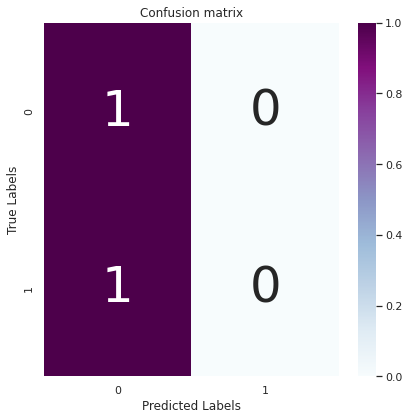

The CA of C parameter 3.359818286283781e-05 is 0.4975124378109453:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6968229564175286:



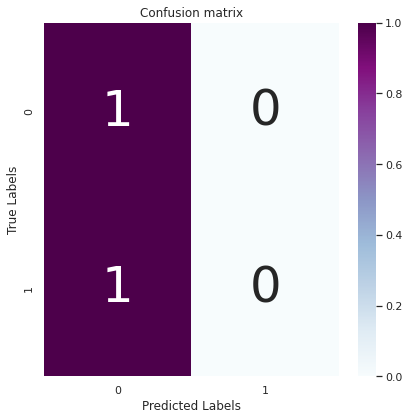

The CA of C parameter 0.00011288378916846884 is 0.4975124378109453:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6951096817287326:



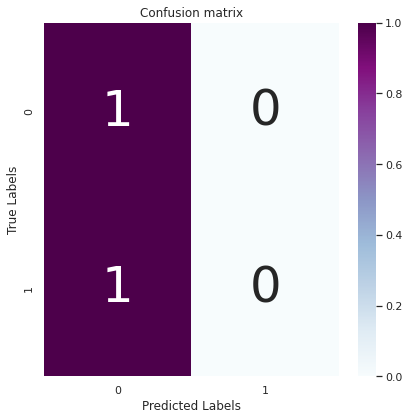

The CA of C parameter 0.000379269019073225 is 0.4975124378109453:
The Logg Loss of C parameter 0.000379269019073225 is 0.6895371385726232:



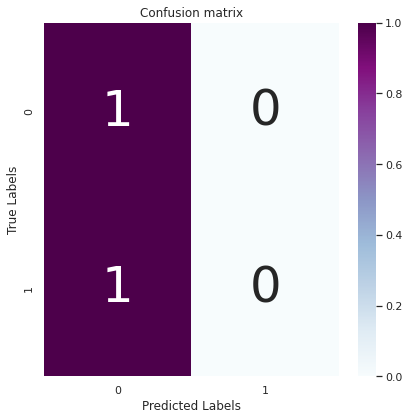

The CA of C parameter 0.0012742749857031334 is 0.5024875621890548:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6726839776380932:



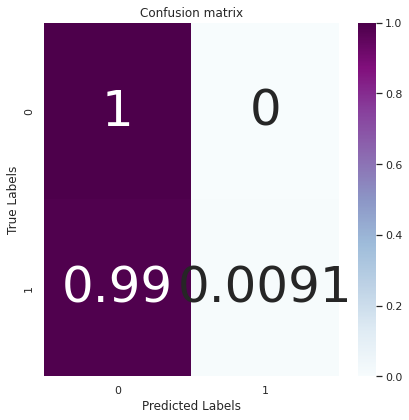

The CA of C parameter 0.004281332398719391 is 0.6666666666666666:
The Logg Loss of C parameter 0.004281332398719391 is 0.631257533519504:



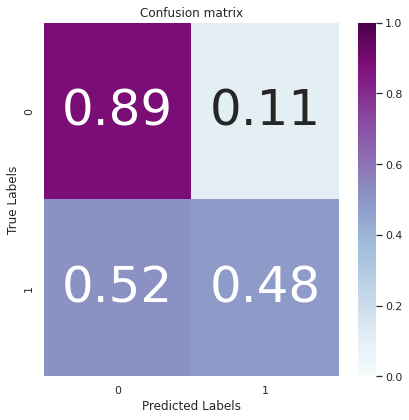

The CA of C parameter 0.01438449888287663 is 0.7512437810945274:
The Logg Loss of C parameter 0.01438449888287663 is 0.5660113358958111:



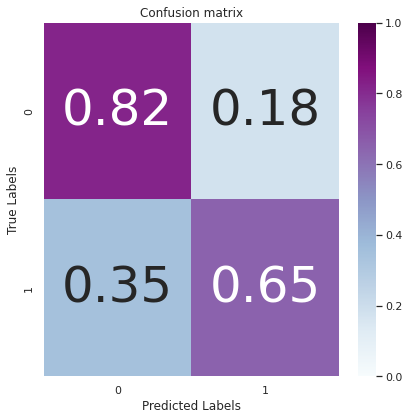

The CA of C parameter 0.04832930238571752 is 0.7661691542288557:
The Logg Loss of C parameter 0.04832930238571752 is 0.5095806141998236:



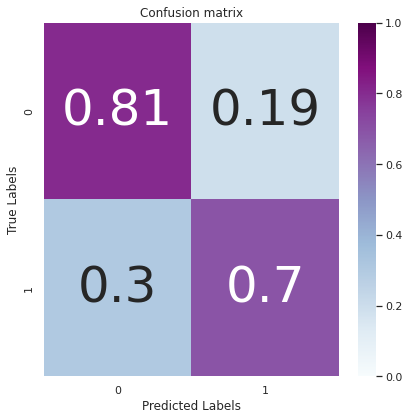

The CA of C parameter 0.1623776739188721 is 0.7860696517412935:
The Logg Loss of C parameter 0.1623776739188721 is 0.48192930955433155:



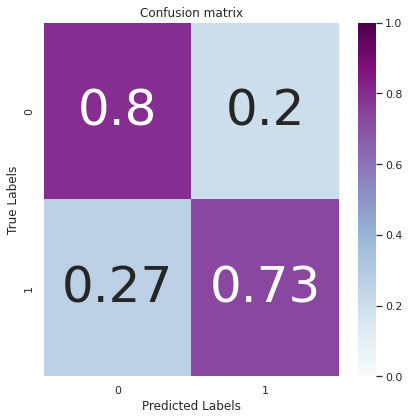

The CA of C parameter 0.5455594781168515 is 0.7860696517412935:
The Logg Loss of C parameter 0.5455594781168515 is 0.476309612480215:



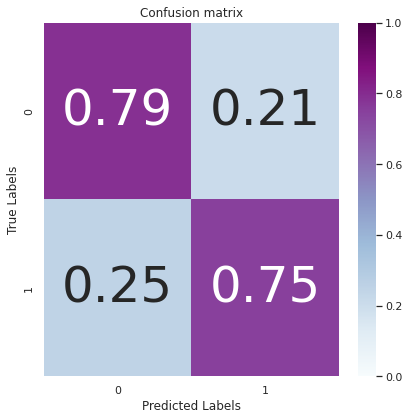

The CA of C parameter 1.8329807108324339 is 0.7860696517412935:
The Logg Loss of C parameter 1.8329807108324339 is 0.4788344349002035:



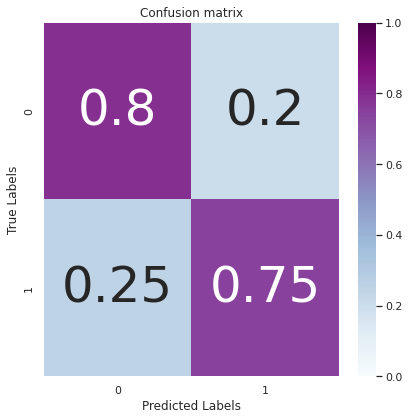

The CA of C parameter 6.1584821106602545 is 0.7860696517412935:
The Logg Loss of C parameter 6.1584821106602545 is 0.4820816301048354:



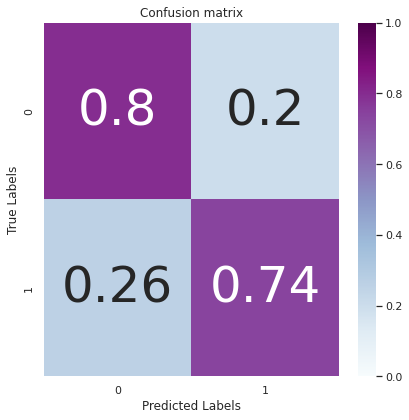

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The CA of C parameter 20.6913808111479 is 0.7860696517412935:
The Logg Loss of C parameter 20.6913808111479 is 0.48484888849637836:



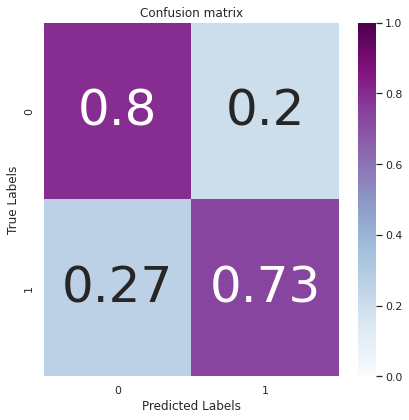

The CA of C parameter 69.51927961775606 is 0.7860696517412935:
The Logg Loss of C parameter 69.51927961775606 is 0.4866903774732693:



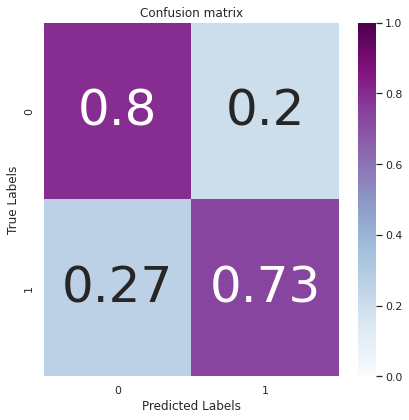

The CA of C parameter 233.57214690901213 is 0.7860696517412935:
The Logg Loss of C parameter 233.57214690901213 is 0.48763678521717413:



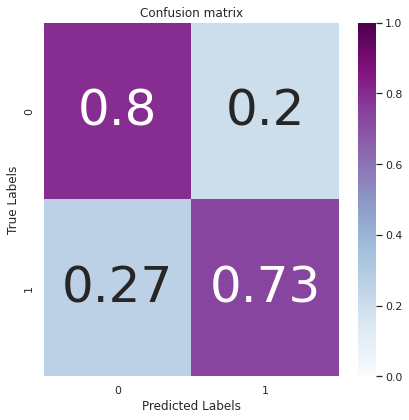

The CA of C parameter 784.7599703514607 is 0.7860696517412935:
The Logg Loss of C parameter 784.7599703514607 is 0.48800210062619087:



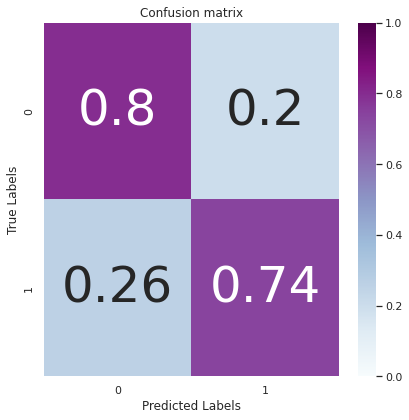

The CA of C parameter 2636.6508987303555 is 0.7860696517412935:
The Logg Loss of C parameter 2636.6508987303555 is 0.4881169749920004:



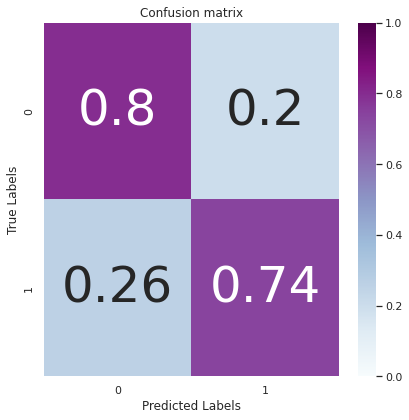

The CA of C parameter 8858.667904100832 is 0.7860696517412935:
The Logg Loss of C parameter 8858.667904100832 is 0.4881460907475809:



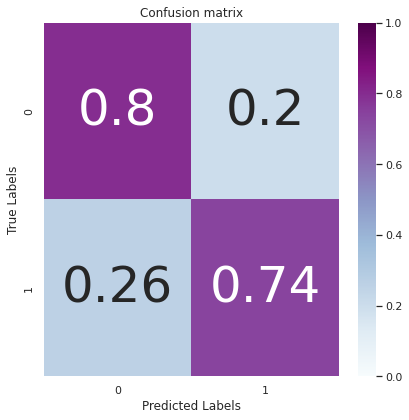

The CA of C parameter 29763.51441631313 is 0.7860696517412935:
The Logg Loss of C parameter 29763.51441631313 is 0.4881439121389047:



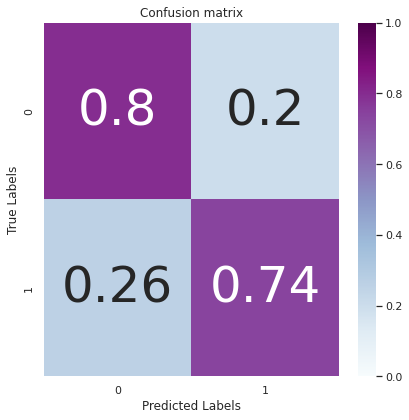

The CA of C parameter 100000.0 is 0.7860696517412935:
The Logg Loss of C parameter 100000.0 is 0.4881788255830934:



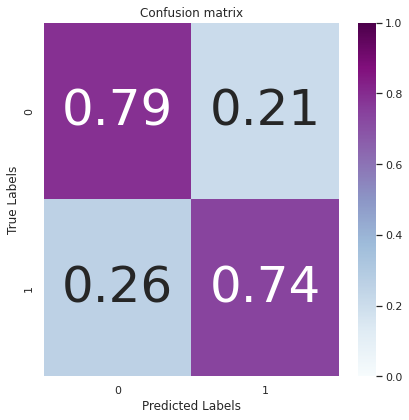

In [99]:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

#### Step 12 : Benchmarking with a Dummy Classifier

The Objectif is that our model beats and performs better than a dummy classifier

In [102]:
# Training a Dummy Classifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_test = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_test)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.4975124378109453
Log Loss: 17.355305551671538


In [111]:
### Our Final Choosen Model to be Delivered 

final_log_reg = LogisticRegression(random_state = 10, solver = 'lbfgs', C = 0.786070)
final_log_reg.fit(X_train, y_train)
Score = final_log_reg.score(X_valid, y_valid)

proba_y_prediction = final_log_reg.predict_proba(X_valid)
Log_Loss_Final = log_loss(y_valid, proba_y_prediction)


print("The Accuracy of our Model : ", Score)
print('The Logarethmic Loss is : ', Log_Loss_Final)

The Accuracy of our Model :  0.725
The Logarethmic Loss is :  0.45966426047029463


What's Next 

- Option 1: Deploy the model in a CRM System or the Cloud or Viz tools and automaticaly decide if a customer should get his loan approved or not.
- Option 2: Analyse the factors that affect a good/bad loan and help the business understand this. Then the business can educate their clients what they need to improve in order to get a loan.
- Option 3: Deploy this model in an open bank website where customers can automatically see if their loan will get approved or not; saving time & cost for the bank/business.